# STA365
## Homework 9
---
### Question 1

2. Repeat the exercise using instead a two pass approach in the manner of https://www.pymc.io/projects/examples/en/latest/howto/copula-estimation.html
3. Describe what a copula is and how the two verions of code implement it 
4. Describe how to use this to create arbitrary multivariate GLM regressions

**Approach 1: Prof's version**

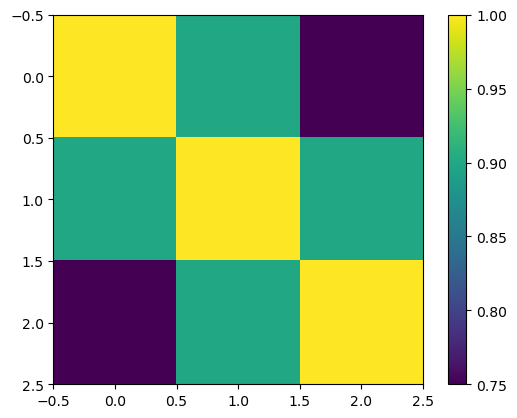

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

p = 3
#Psi = np.eye(p)
#a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
a_cor = (np.ones((p,p))*9+np.diag((1,1,1)))/10
a_cor[0,-1] -= 0.15
a_cor[-1,0] -= 0.15

n = 100
x = stats.multivariate_normal(mean=np.zeros(p), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar();

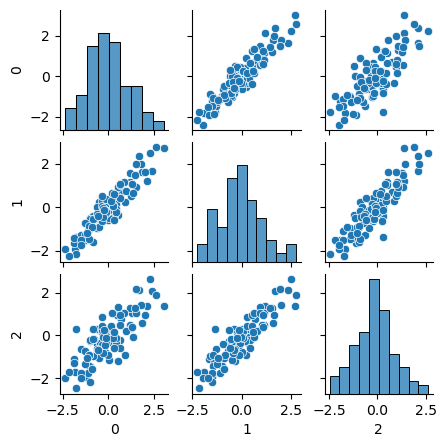

In [4]:
import seaborn
import pandas as pd
seaborn.pairplot(pd.DataFrame(x),height=1.5);

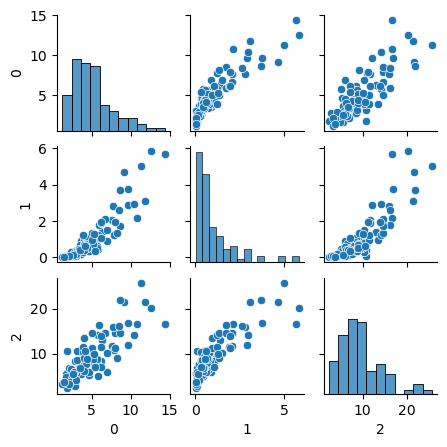

In [5]:
y = x.copy()
y[:,0] = stats.gamma(a=5).ppf(stats.norm().cdf(x[:,0]))
y[:,1] = stats.expon(scale=1).ppf(stats.norm().cdf(x[:,1]))
y[:,2] = stats.chi2(df=10).ppf(stats.norm().cdf(x[:,2]))

seaborn.pairplot(pd.DataFrame(y),height=1.5);

In [6]:
import pymc as pm
import arviz as az

with pm.Model() as copula:

    p0 = pm.HalfNormal('p0', sigma=10)
    y0 = pm.Gamma('y0', alpha=p0, beta=1, observed=y[:,0:1])
    y0_ = pm.Deterministic('y0_',
    pm.Normal.icdf(
        pm.math.exp(pm.logcdf(pm.Gamma.dist(alpha=p0, beta=1), y0)),
        mu=0, sigma=1))


    
    p1 = pm.HalfNormal('p1', sigma=10)
    y1 = pm.Exponential('y1', lam=p1, observed=y[:,1:2])
    y1_ = pm.Deterministic('y1_', 
            pm.Normal.icdf(
               pm.math.exp(pm.Exponential.logcdf(y1, mu=p1)), 
                           mu=0, sigma=1))

    p2 = pm.HalfNormal('p2', sigma=10)
    y2 = pm.ChiSquared('y2', nu=p2, observed=y[:,2:3])
    y2_ = pm.Deterministic('y2_', pm.Normal.icdf(
        pm.math.exp(pm.logcdf(pm.ChiSquared.dist(nu=p2), y2)),
        mu=0, sigma=1))

    
    L,R,stds = pm.LKJCholeskyCov("R", n=3, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=3), 
                                 compute_corr=True)
    
    potential = pm.Potential("MVNeval", 
                             pm.logp(pm.MvNormal.dist(mu=0, cov=R),
                             pm.math.concatenate([y0_,y1_,y2_], axis=1)))
    
    idata = pm.sample()

# This probally produces a lot of warnings but it will run and provide inference

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor

ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pyte

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/pytho

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



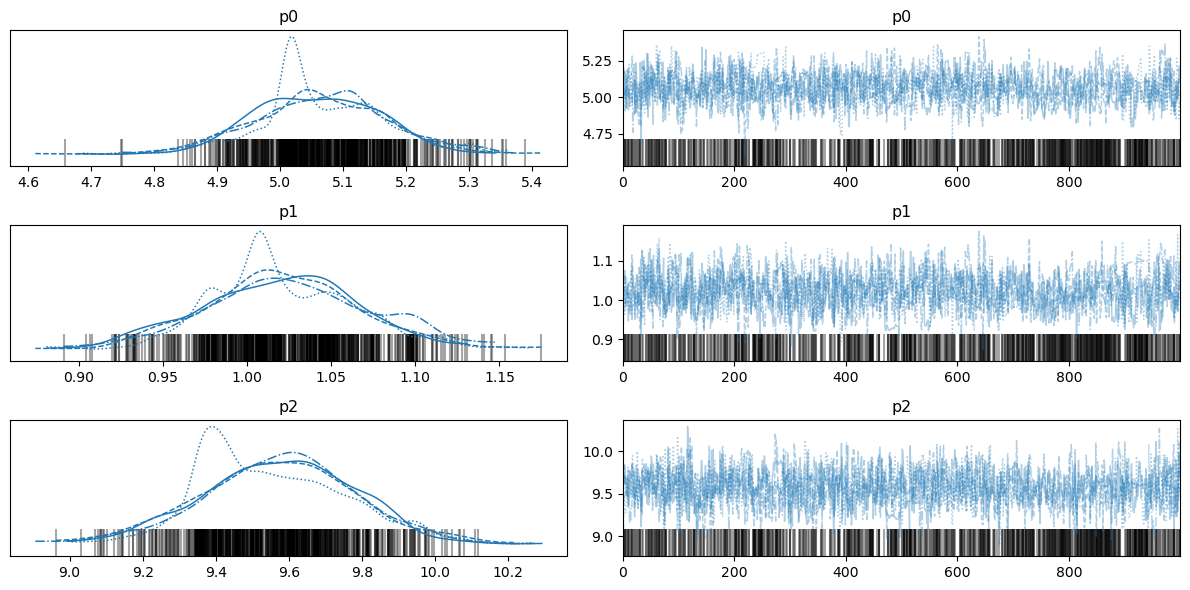

In [7]:

# Estimation is essentially correct
az.plot_trace(idata, var_names=['p0','p1','p2'])
plt.tight_layout()

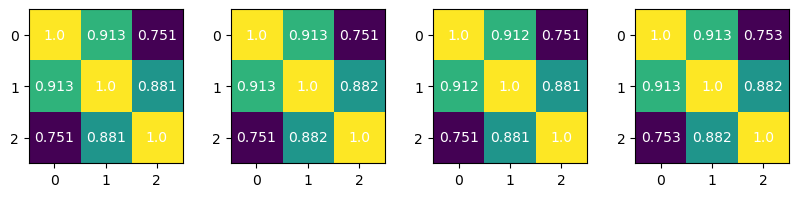

In [8]:
# Estimation is essentially correct
fig,ax = plt.subplots(1,4,figsize=(10,2))
for i,c in enumerate(list(idata.posterior['R_corr'].values.mean(axis=1))):
    ax[i].imshow(c)
    for k in range(3):
        for j in range(3):
            ax[i].text(j,k,s=str(round(c[j,k],3)), 
                       color='w', va='center', ha='center')

**Approach 2: PyMC version**

In [9]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pytensor.tensor as pt
import seaborn as sns

from scipy.stats import expon, multivariate_normal, norm

In [10]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.rcParams.update({"font.size": 14, "figure.constrained_layout.use": False})
SEED = 43
rng = np.random.default_rng(SEED)

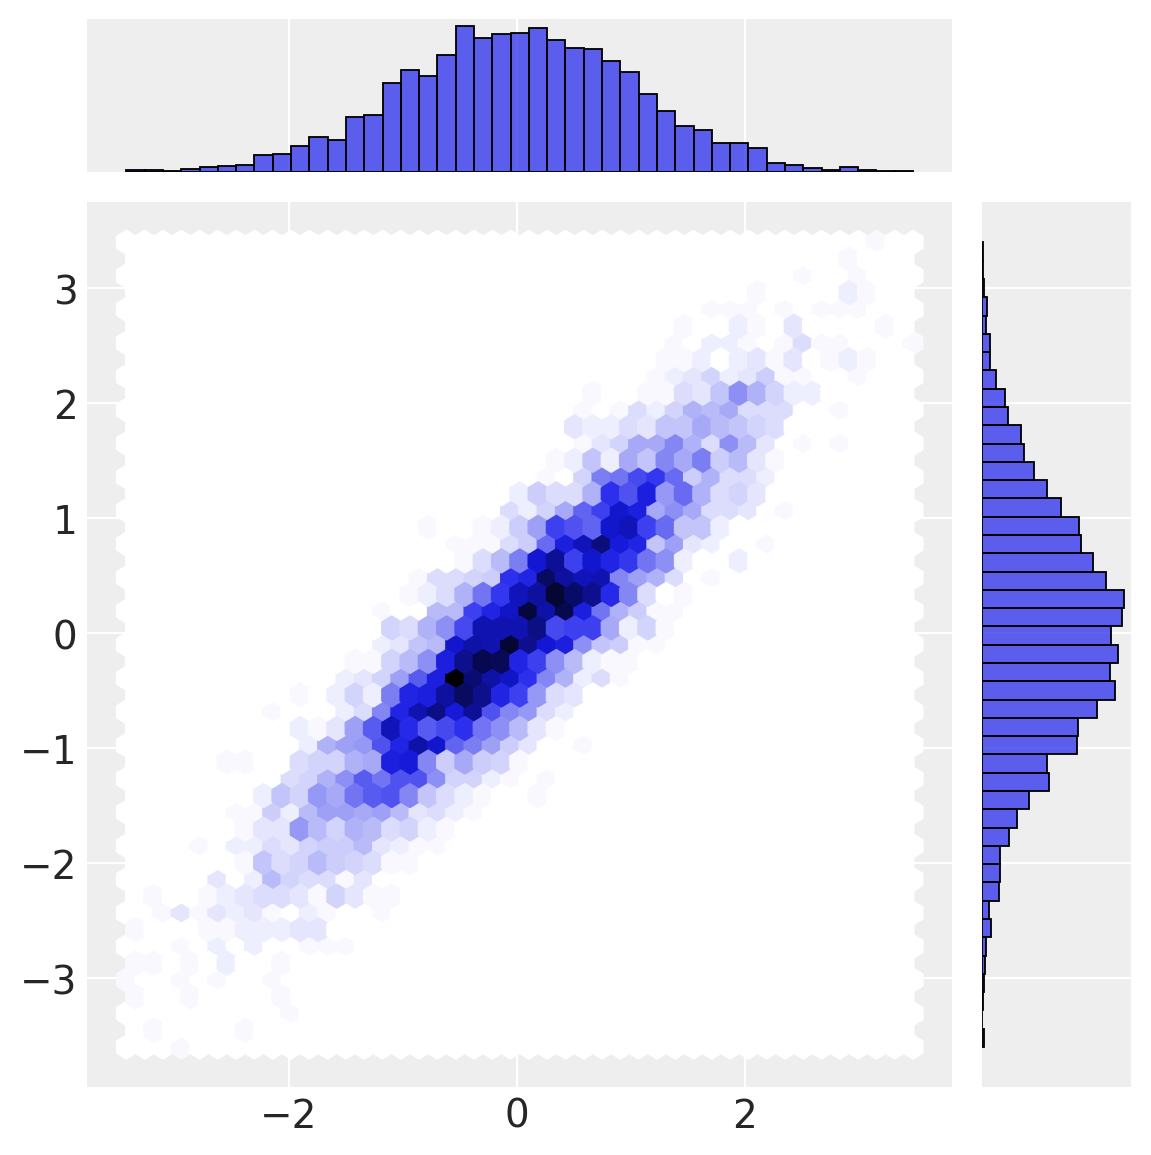

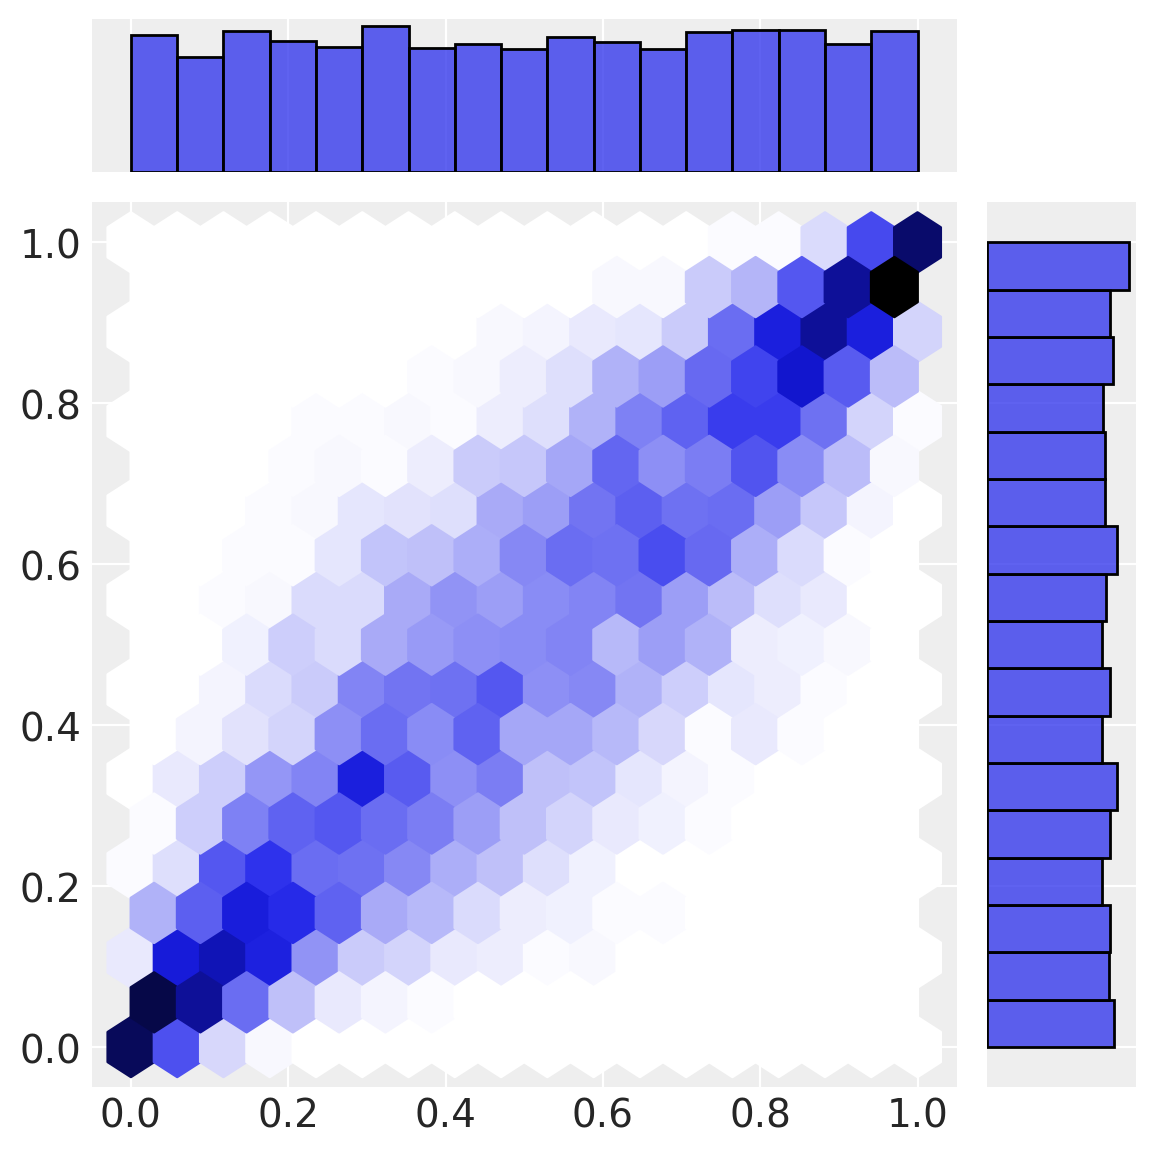

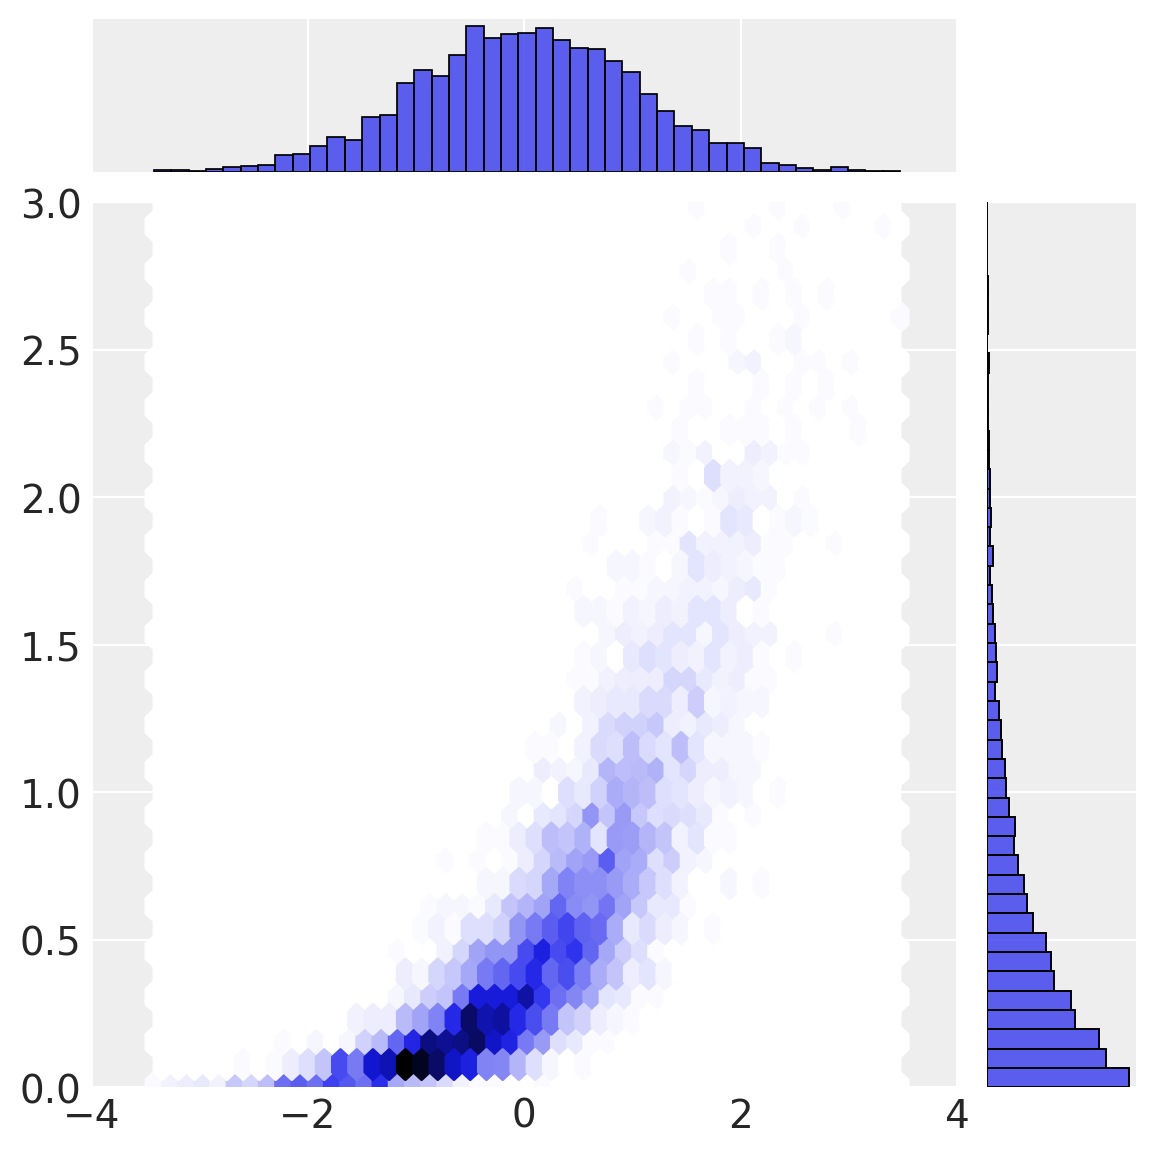

In [11]:
# define properties of our copula
b_scale = 2
θ = {"a_dist": norm(), "b_dist": expon(scale=1 / b_scale), "rho": 0.9}
n_samples = 5000

# draw random samples in multivariate normal space
mu = [0, 0]
cov = [[1, θ["rho"]], [θ["rho"], 1]]
x = multivariate_normal(mu, cov).rvs(n_samples, random_state=rng)
a_norm = x[:, 0]
b_norm = x[:, 1]

sns.jointplot(x=a_norm, y=b_norm, height=6, kind="hex");

# make marginals uniform
a_unif = norm(loc=0, scale=1).cdf(a_norm)
b_unif = norm(loc=0, scale=1).cdf(b_norm)
sns.jointplot(x=a_unif, y=b_unif, height=6, kind="hex");

# transform to observation space
a = θ["a_dist"].ppf(a_unif)
b = θ["b_dist"].ppf(b_unif)
sns.jointplot(x=a, y=b, height=6, kind="hex", xlim=(-4, 4), ylim=(0, 3));

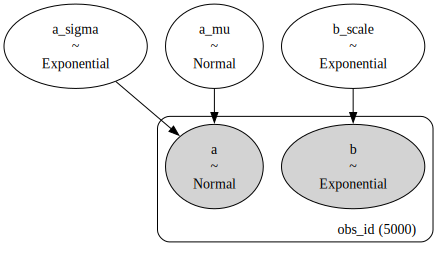

In [12]:
coords = {"obs_id": np.arange(len(a))}
with pm.Model(coords=coords) as marginal_model:
    """
    Assumes observed data in variables `a` and `b`
    """
    # marginal estimation
    a_mu = pm.Normal("a_mu", mu=0, sigma=1)
    a_sigma = pm.Exponential("a_sigma", lam=0.5)
    pm.Normal("a", mu=a_mu, sigma=a_sigma, observed=a, dims="obs_id")

    b_scale = pm.Exponential("b_scale", lam=0.5)
    pm.Exponential("b", lam=1 / b_scale, observed=b, dims="obs_id")

pm.model_graph.model_to_graphviz(marginal_model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_mu, a_sigma, b_scale]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


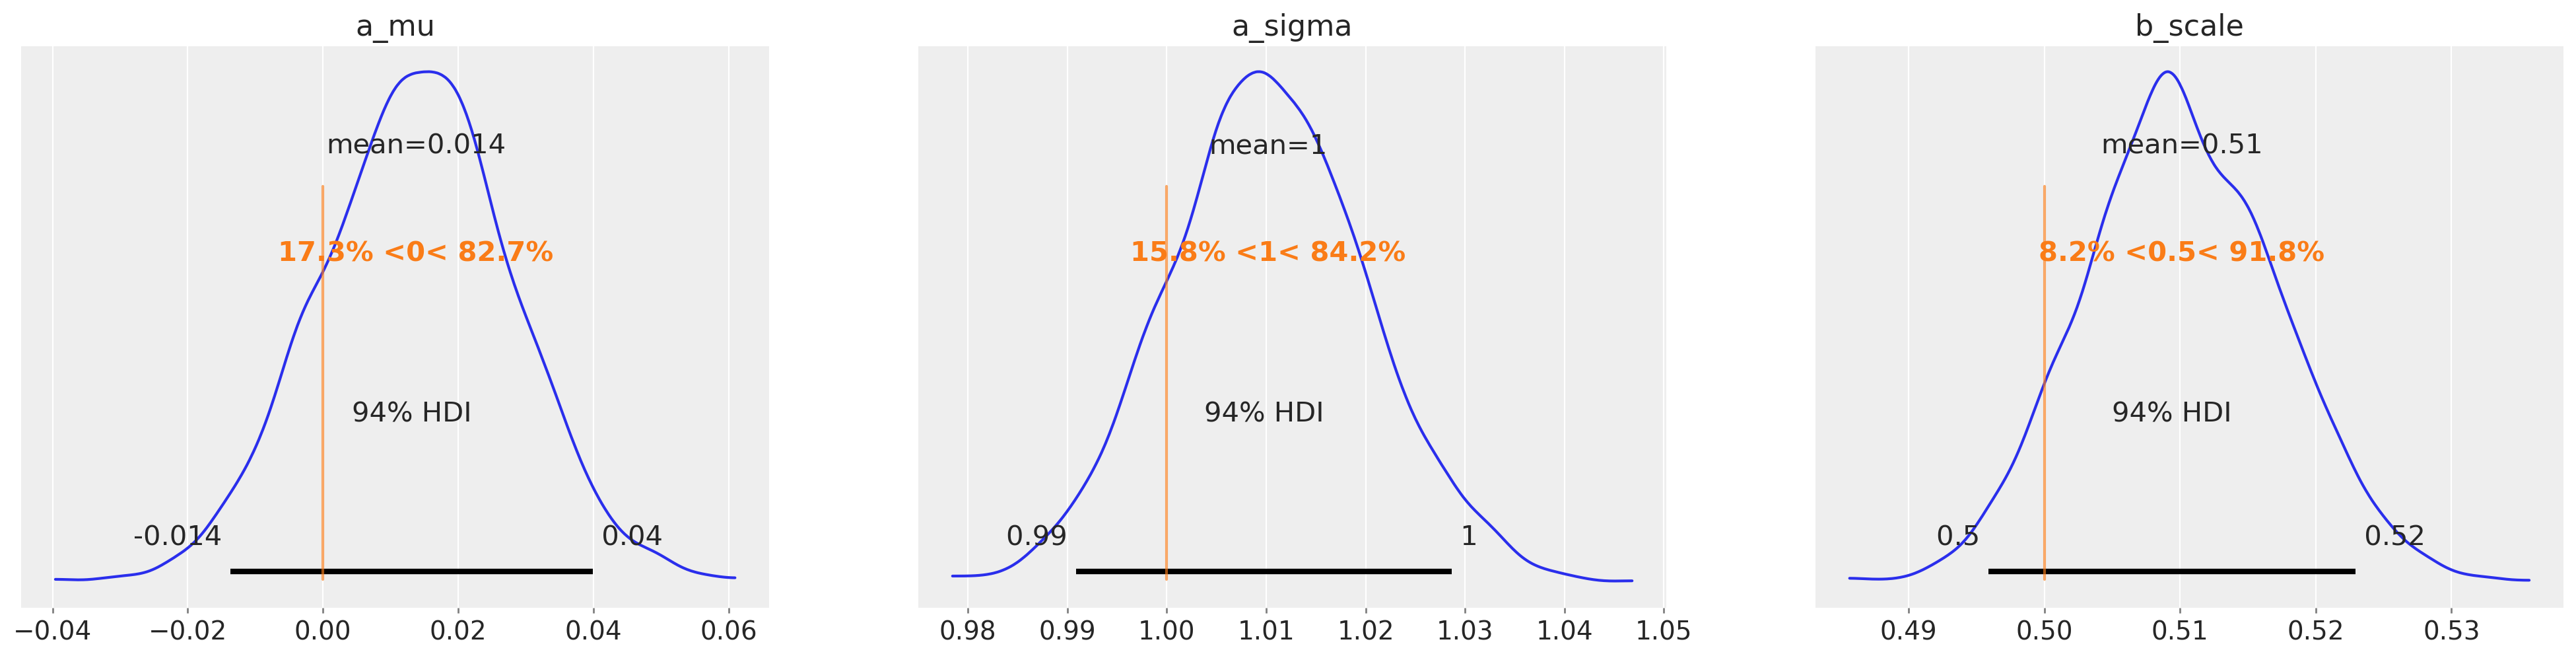

In [13]:
with marginal_model:
    marginal_idata = pm.sample(random_seed=rng)

az.plot_posterior(
    marginal_idata, var_names=["a_mu", "a_sigma", "b_scale"], ref_val=[0, 1.0, 1 / 2.0]
);

In [14]:
def transform_data(marginal_idata):
    # point estimates
    a_mu = marginal_idata.posterior["a_mu"].mean().item()
    a_sigma = marginal_idata.posterior["a_sigma"].mean().item()
    b_scale = marginal_idata.posterior["b_scale"].mean().item()
    # transformations from observation space -> uniform space
    __a = pt.exp(pm.logcdf(pm.Normal.dist(mu=a_mu, sigma=a_sigma), a))
    __b = pt.exp(pm.logcdf(pm.Exponential.dist(lam=1 / b_scale), b))
    # uniform space -> multivariate normal space
    _a = pm.math.probit(__a)
    _b = pm.math.probit(__b)
    # join into an Nx2 matrix
    data = pt.math.stack([_a, _b], axis=1).eval()
    return data, a_mu, a_sigma, b_scale


data, a_mu, a_sigma, b_scale = transform_data(marginal_idata)

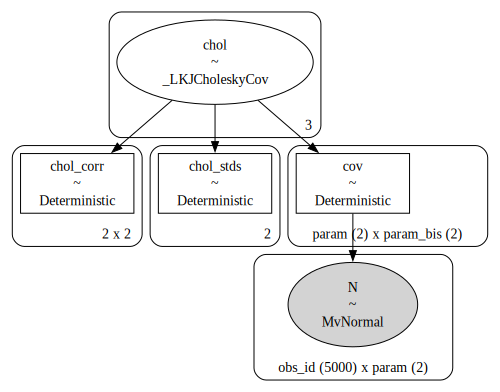

In [15]:
coords.update({"param": ["a", "b"], "param_bis": ["a", "b"]})
with pm.Model(coords=coords) as copula_model:
    # Prior on covariance of the multivariate normal
    chol, corr, stds = pm.LKJCholeskyCov(
        "chol",
        n=2,
        eta=2.0,
        sd_dist=pm.Exponential.dist(1.0),
        compute_corr=True,
    )
    cov = pm.Deterministic("cov", chol.dot(chol.T), dims=("param", "param_bis"))

    # Likelihood function
    pm.MvNormal("N", mu=0.0, cov=cov, observed=data, dims=("obs_id", "param"))

pm.model_graph.model_to_graphviz(copula_model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [chol]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 73 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


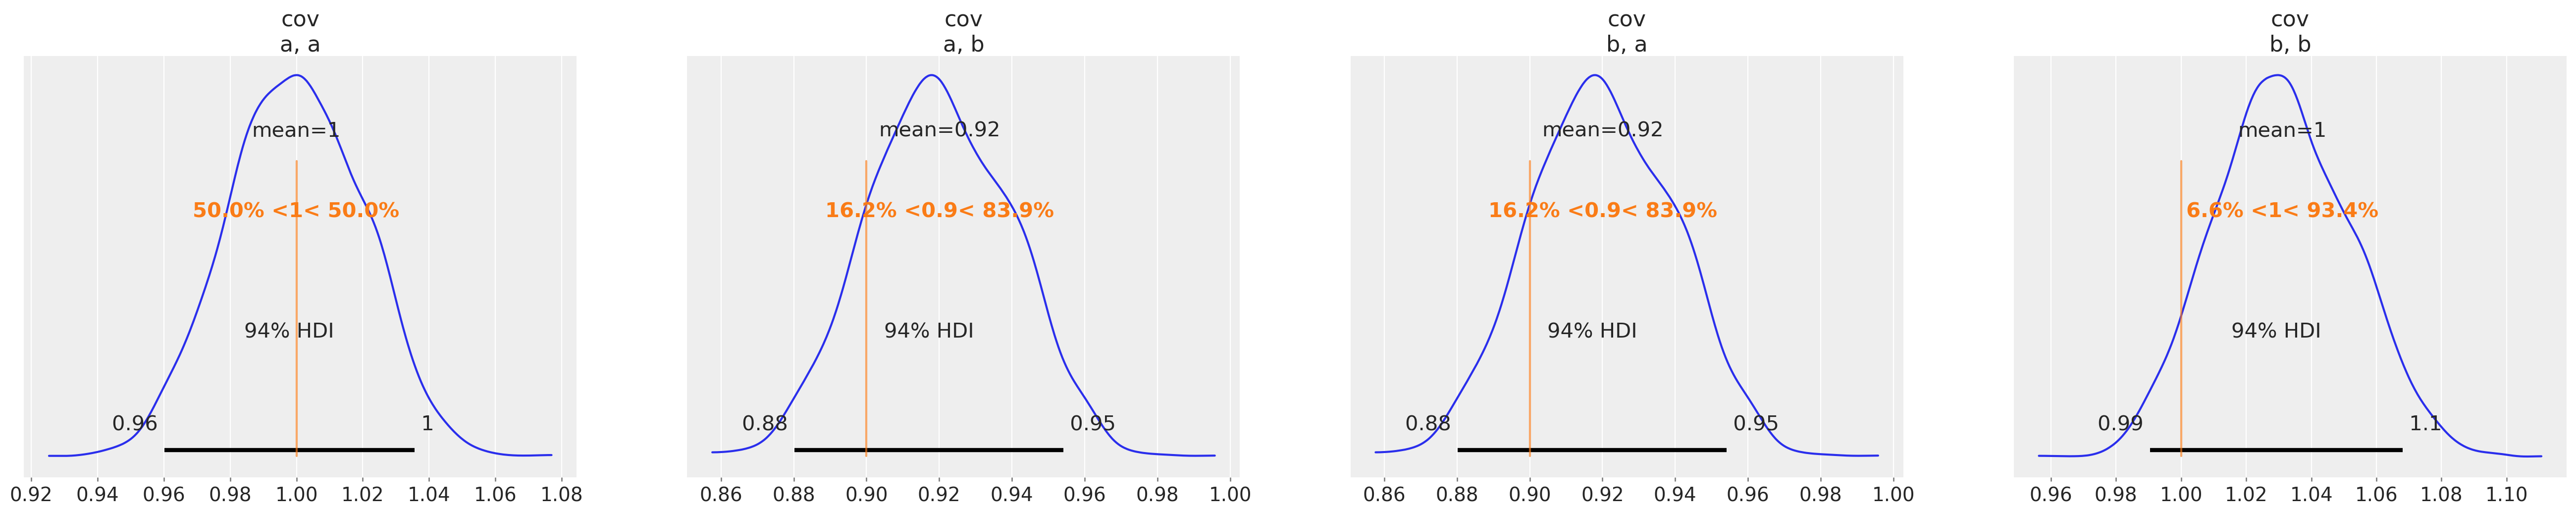

In [16]:
with copula_model:
    copula_idata = pm.sample(random_seed=rng, tune=2000, cores=1)

az.plot_posterior(copula_idata, var_names=["cov"], ref_val=[1.0, θ["rho"], θ["rho"], 1.0]);

In [17]:
# data munging to extract covariance estimates from copula_idata in useful shape
d = {k: v.values.reshape((-1, *v.shape[2:])) for k, v in copula_idata.posterior[["cov"]].items()}

# generate (a, b) samples
ab = np.vstack([multivariate_normal([0, 0], cov).rvs() for cov in d["cov"]])

# transform to uniform space
uniform_a = norm().cdf(ab[:, 0])
uniform_b = norm().cdf(ab[:, 1])

# transform to observation space
# estimated marginal parameters a_mu, a_sigma, b_scale are point estimates from marginal estimation.
ppc_a = norm(loc=a_mu, scale=a_sigma).ppf(uniform_a)
ppc_b = expon(scale=b_scale).ppf(uniform_b)

/opt/conda/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/kdeplot.py:166: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(x_x, y_y, density, **contour_kwargs)


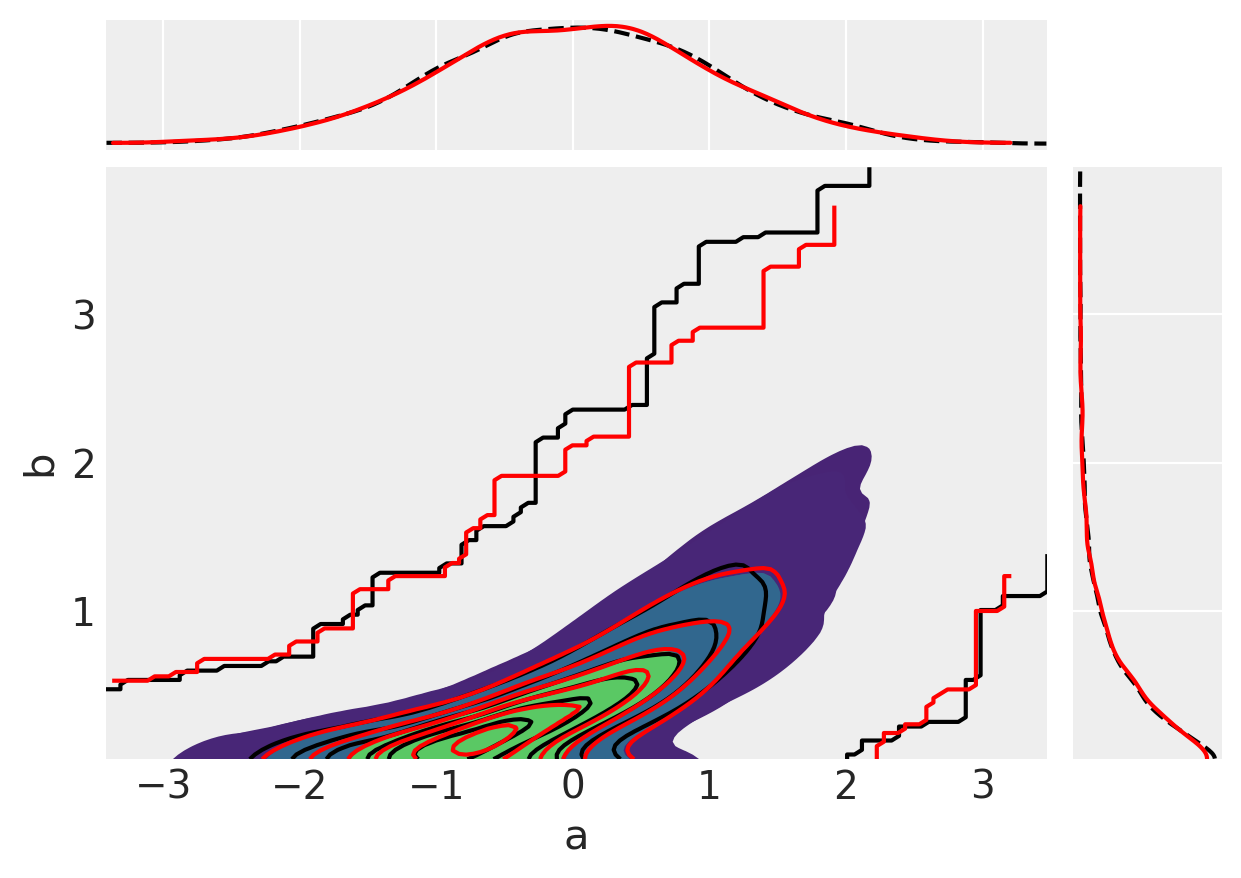

In [18]:
# plot data in black
ax = az.plot_pair(
    {"a": a, "b": b},
    marginals=True,
    # kind=["kde", "scatter"],
    kind="kde",
    scatter_kwargs={"alpha": 0.1},
    kde_kwargs=dict(
        contour_kwargs=dict(colors="k", linestyles="--"), contourf_kwargs=dict(alpha=0)
    ),
    marginal_kwargs=dict(color="k", plot_kwargs=dict(ls="--")),
)

# plot inferences in red
axs = az.plot_pair(
    {"a": ppc_a, "b": ppc_b},
    marginals=True,
    # kind=["kde", "scatter"],
    kind="kde",
    scatter_kwargs={"alpha": 0.01},
    kde_kwargs=dict(contour_kwargs=dict(colors="r", linestyles="-"), contourf_kwargs=dict(alpha=0)),
    marginal_kwargs=dict(color="r"),
    ax=ax,
);

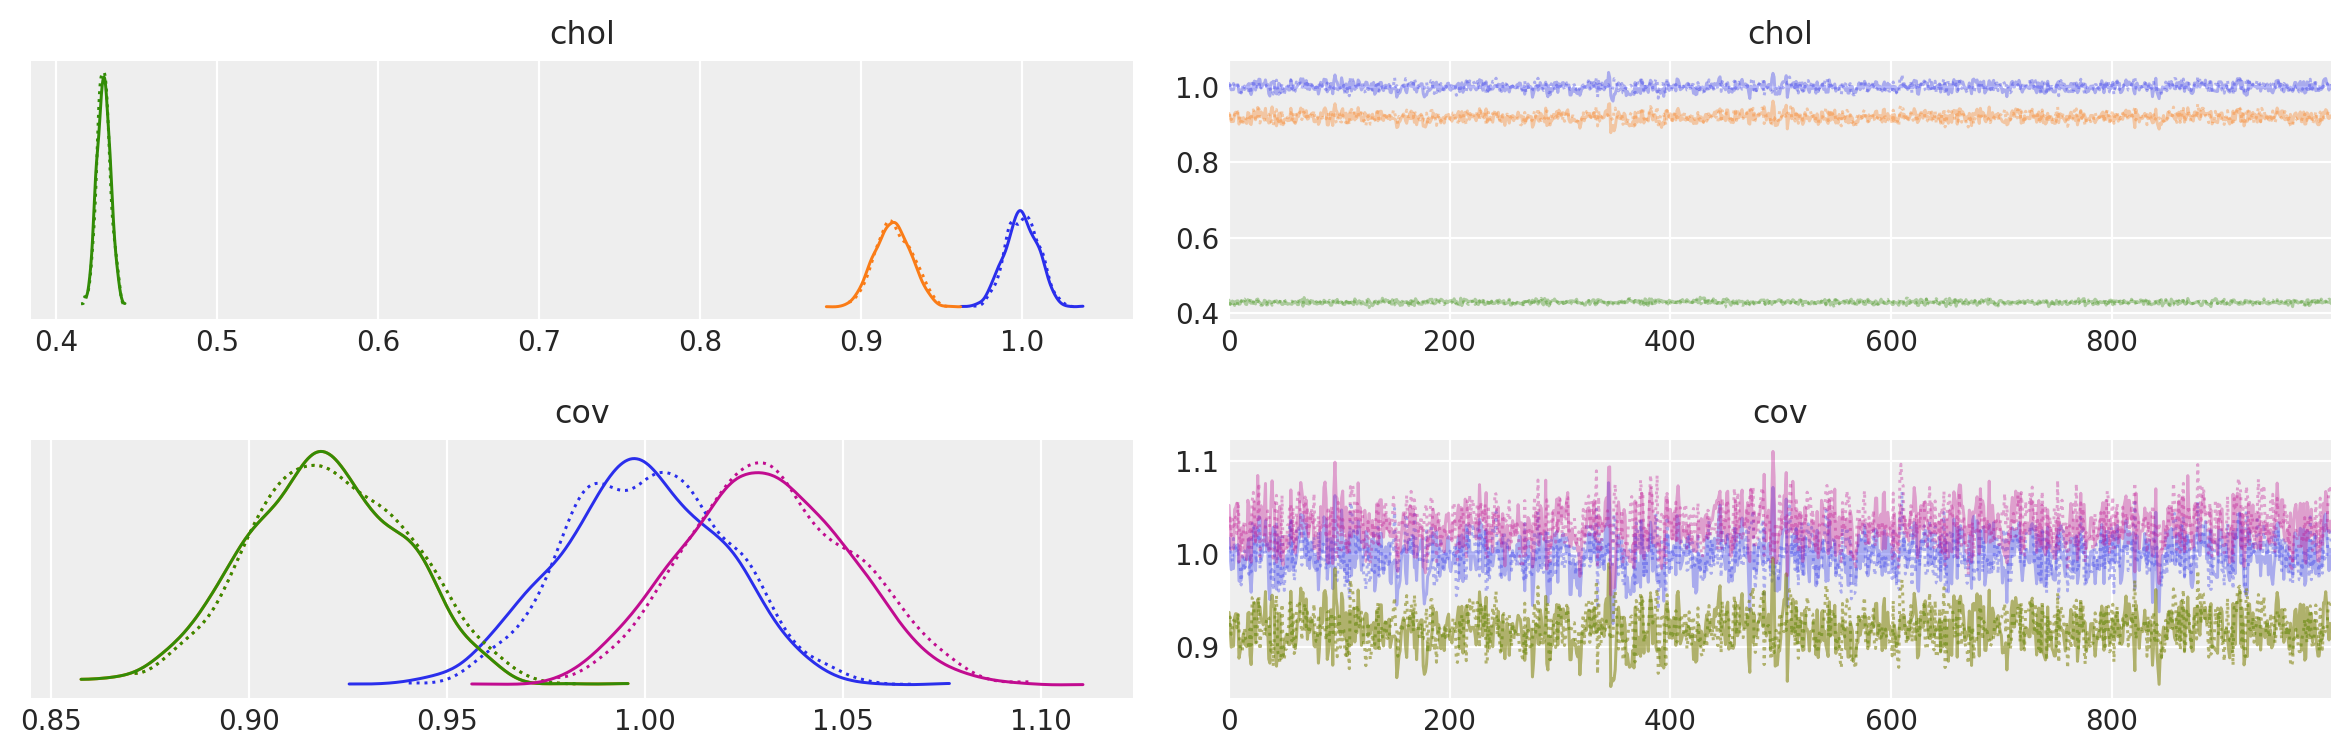

In [36]:
az.plot_trace(copula_idata, var_names=['chol','cov'])
plt.tight_layout()

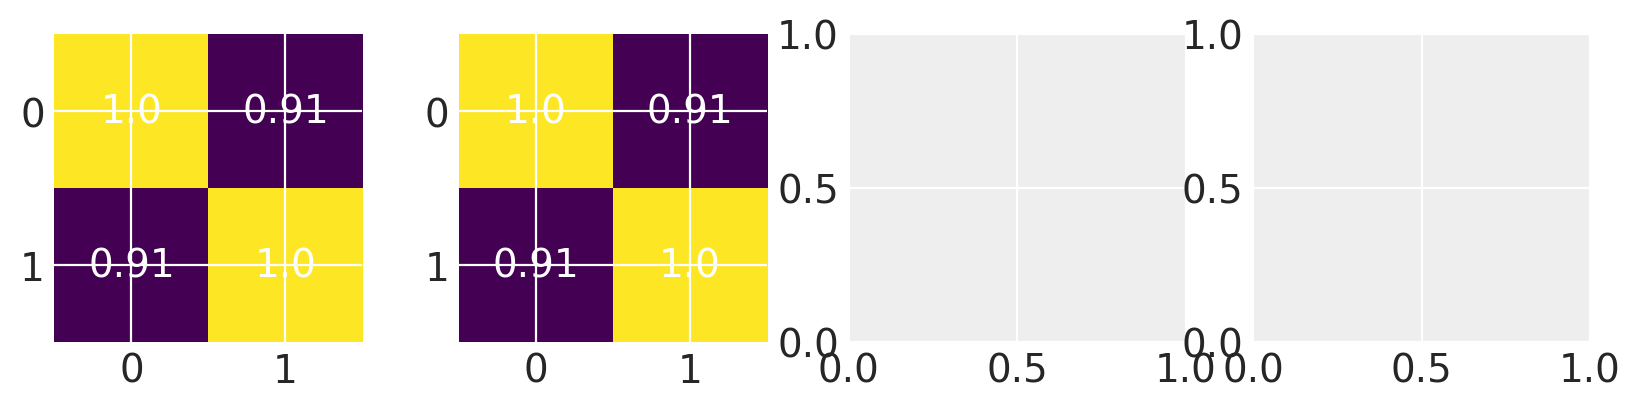

In [40]:
# Estimation is essentially correct
fig,ax = plt.subplots(1,4,figsize=(10,2))
for i,c in enumerate(list(copula_idata.posterior['chol_corr'].values.mean(axis=1))):
    ax[i].imshow(c)
    for k in range(2):
        for j in range(2):
            ax[i].text(j,k,s=str(round(c[j,k],2)), 
                       color='w', va='center', ha='center')

Interpretation
The trace and posterior plots for the parameters p0, p1, and p2 of the first version indicate good model convergence and reliable parameter estimation. Each parameter shows a unimodal posterior distribution, with p0 centered around 5.0, p1 around 1.0, and p2 around 9.5, suggesting well-identified values with low uncertainty. The trace plots show well-mixed chains with no signs of divergence or sticking, further supporting the stability of the model. In addition to that, the posterior correlation matrices reveal strong positive correlations among all three parameters, particularly between p0 and p1 (correlation around 0.91). These correlations are consistent across chains or posterior draws, implying that the model captures meaningful dependencies among parameters. While such correlations are not problematic, they suggest that changes in one parameter may influence inference on others and should be considered when interpreting results. Overall, the model appears well-behaved and the parameter estimates are trustworthy.

The trace and posterior plots for the second version shows the Cholesky components (chol) and the derived covariance matrix (cov) that indicate that the model is well-identified and sampling efficiently. The posterior densities of the Cholesky factors are sharp and clearly separated, with trace plots showing tightly clustered, stable chains that exhibit no signs of drift or divergence. This suggests that the Cholesky decomposition has been successfully estimated. The covariance matrix elements, derived from these factors, have posterior means close to 1.0, indicating a near-unit variance structure. Although the trace plots for cov are noisier, they still show good mixing across chains. The corresponding posterior correlation heatmaps show consistent and strong correlations (approximately 0.91) between variable pairs, but only for a 2×2 structure—suggesting a lower-dimensional model compared to the earlier 3×3 setup. The absence of values in some heatmap grids are because of pruned variables or reduced dimensions across samples or chains. Overall, the Cholesky-based modeling of the covariance structure appears stable and well-behaved.


3. COPULA


A copula is a mathematical tool that allows us to model the dependency structure between random variables independently of their marginal distributions. It enables the construction of a multivariate joint distribution by linking individual univariate marginals, which is especially useful when the marginals are non-Gaussian but we still want to model their joint behavior using a familiar structure like the multivariate normal. The one-pass copula implementation fits the marginals and applies the copula transformation within a single PyMC model. It does this by transforming each marginal variable through its CDF into the unit interval, then applying the inverse CDF of the standard normal distribution to map it to a Gaussian space. These transformed variables are then combined into a multivariate normal distribution to model their dependencies. In contrast, the two-pass approach separates the modeling into two distinct stages: first, it fits each marginal distribution independently and transforms the data into the copula space using posterior estimates; second, it fits a multivariate distribution (such as a multivariate normal or Student-t) to the transformed variables. This can be seen from the maps printed above. While the one-pass method is compact and efficient, the two-pass approach offers more flexibility and interpretability by decoupling the marginals from the dependency model, allowing for more control and insight at each stage of the modeling process.


4. CREATING ARBITRARY MULTIVARIATE GLM REGRESSIONS


To use copulas for arbitrary multivariate Generalized Linear Model (GLM) regressions, we take advantage of the copula’s ability to separate marginal behavior from joint dependency. In a multivariate GLM context, each response variable may follow a different distribution (e.g., Gaussian, Poisson, Gamma), and the copula allows us to model the dependency between these heterogeneous outcomes. The process begins by fitting separate GLMs for each marginal outcome using appropriate likelihoods and link functions. Each fitted marginal is then transformed via its cumulative distribution function (CDF) into the uniform [0, 1] space, and further mapped to a standard normal space using the inverse CDF of the normal distribution. These transformed responses now reside in a common Gaussian space, regardless of their original distributions. A multivariate normal distribution (or another copula-based dependency structure) is then placed over the transformed variables to model their joint dependence. By structuring the model this way, we can flexibly combine different GLM families into a unified multivariate framework, while capturing correlations between outcomes through the copula. This approach is particularly useful in scenarios with mixed outcome types or when modeling dependencies across multiple response variables with different distributions. Hence, the first approach is more flexible compared to the pyMC version.


### Q2: Variable Selection using Spike and Slab

Perform multivarite regression (or multivariate probit classification) with spike and slab variable selection priors and compare inference to analagous inference with diffuse normal priors (imposing minimal L2 style regularization on the likelihood).

You may artificially limit the size of your data to reduce the computational demands, but if you do so, discuss the behavior of the computational demands with respect to the number of observations $n$, the number of random variables $m$ making up the multivariate observations, and the number of columns of the design matrix $p$.

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p, slab]
>BinaryGibbsMetropolis: [spike]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
There were 277 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


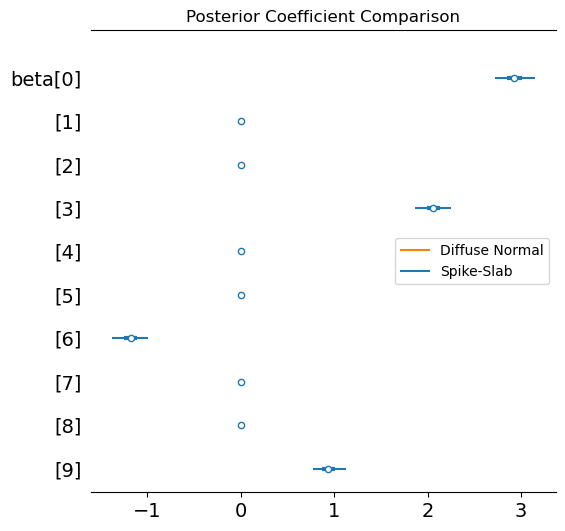

Inclusion probabilities from spike-and-slab:
Variable 0: 1.00
Variable 1: 0.01
Variable 2: 0.01
Variable 3: 1.00
Variable 4: 0.02
Variable 5: 0.01
Variable 6: 1.00
Variable 7: 0.01
Variable 8: 0.01
Variable 9: 1.00


In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Simulate Data
np.random.seed(42)

n = 100   # number of observations
t = 10    # number of predictors
true_beta = np.array([3, 0, 0, 2, 0, 0, -1, 0, 0, 1])  # sparse true weights
X = np.random.normal(0, 1, size=(n, t))
noise = np.random.normal(0, 1, size=n)
y = X @ true_beta + noise


# Spike-and-Slab Model
with pm.Model() as spike_slab_model:
    p = pm.Beta('p', alpha=1, beta=1)
    spike = pm.Bernoulli('spike', p=p, shape=t)
    slab = pm.Normal('slab', mu=0, sigma=10, shape=t)
    beta = pm.Deterministic('beta', spike * slab)
    
    mu = pm.math.dot(X, beta)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=1, observed=y)

    trace_spike = pm.sample(1000, tune=1000, target_accept=0.9)


# Diffuse Normal Prior Model
with pm.Model() as diffuse_model:
    w = pm.Normal('w', mu=0, sigma=10, shape=t)
    mu = pm.math.dot(X, w)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=1, observed=y)

    trace_diffuse = pm.sample(1000, tune=1000, target_accept=0.9)


# Compare Posterior Results
az.plot_forest([trace_spike, trace_diffuse], 
               model_names=["Spike-Slab", "Diffuse Normal"], 
               var_names=["beta" if "beta" in trace_spike.posterior else "w"], 
               combined=True)
plt.title("Posterior Coefficient Comparison")
plt.show()

# Spike probabilities
spike_probs = trace_spike.posterior["spike"].mean(dim=("chain", "draw")).values
print("Inclusion probabilities from spike-and-slab:")
for i, prob in enumerate(spike_probs):
    print(f"Variable {i}: {prob:.2f}")


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 'slab'}>,
        <Axes: title={'center': 'slab'}>],
       [<Axes: title={'center': 'spike'}>,
        <Axes: title={'center': 'spike'}>]], dtype=object)

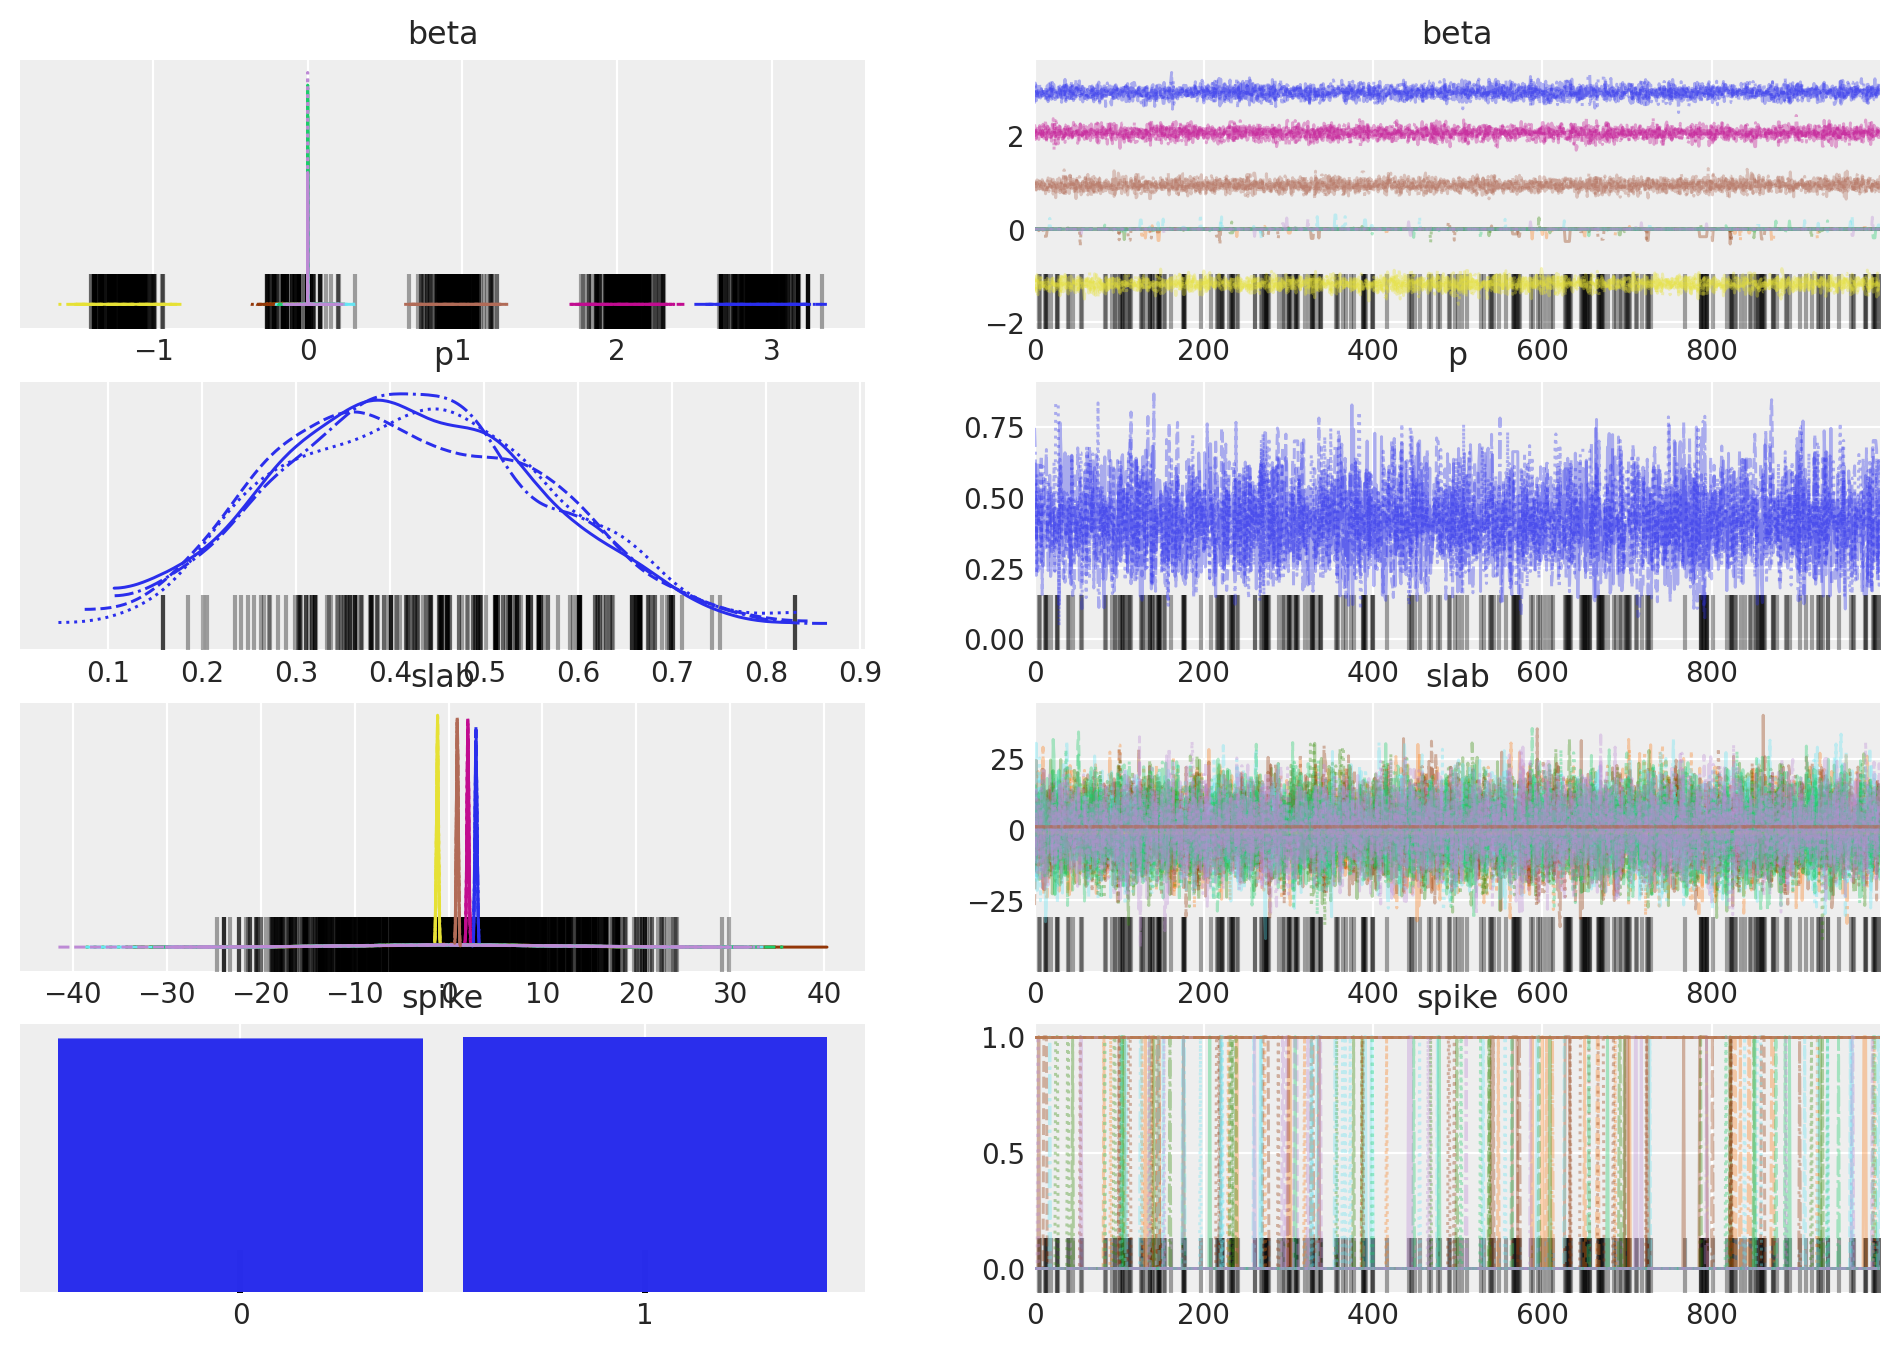

In [33]:
az.plot_trace(trace_spike, var_names=["beta", "p", "slab", "spike"])

array([[<Axes: title={'center': 'w'}>, <Axes: title={'center': 'w'}>]],
      dtype=object)

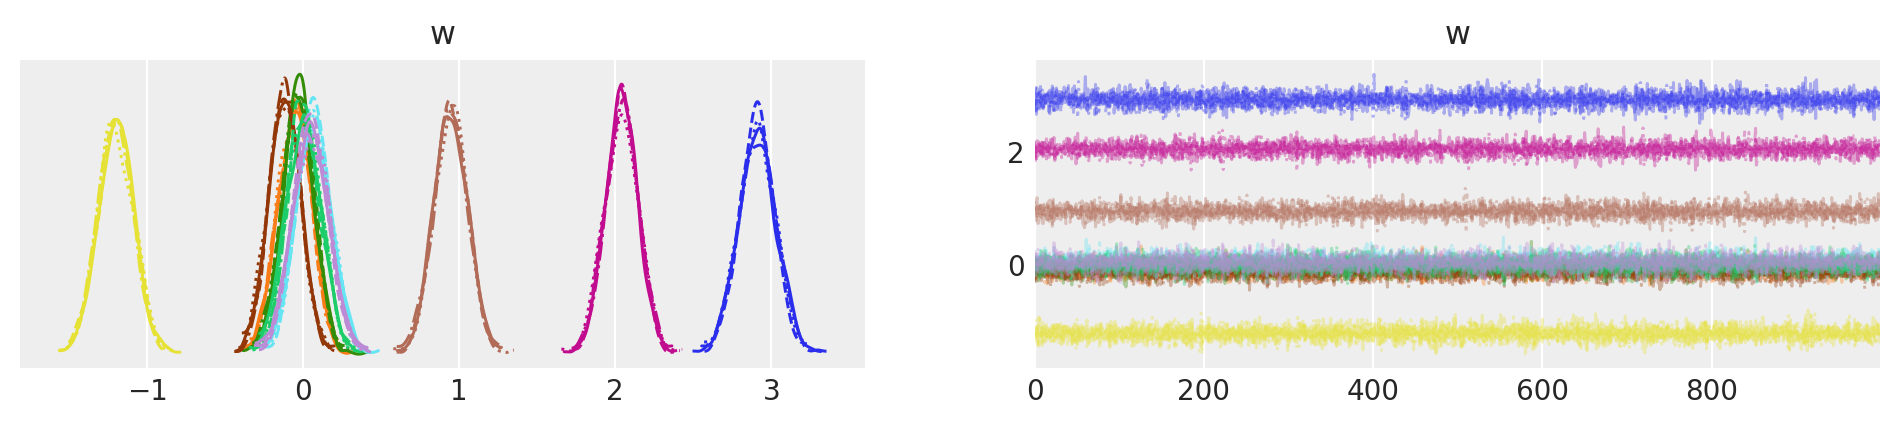

In [34]:
az.plot_trace(trace_diffuse, var_names=["w"])

**Interpretation**


In this multivariate regression task, we compare the use of spike-and-slab variable selection priors with a standard diffuse normal prior (which imposes minimal L2-style regularization). The posterior coefficient comparison plot clearly illustrates the strength of the spike-and-slab approach: only a subset of variables (notably beta[0], beta[3], beta[6], and beta[9]) have non-zero posterior means, while all others are shrunk to near-zero with high certainty. This selective shrinkage highlights the spike-and-slab prior’s ability to distinguish signal from noise by including only relevant predictors. In contrast, the diffuse normal prior includes all coefficients and distributes the uncertainty across them, even for those that are likely irrelevant.

The trace and density plots for the spike-and-slab model support this conclusion: the beta values for inactive predictors cluster around zero, while active ones show distinguishable posterior mass. Additionally, the inclusion probabilities (spike) are either 0 or 1, indicating decisive variable selection. The trace plots for parameters like p, slab, and spike are stable and well-mixed, further confirming convergence. On the other hand, the diffuse normal model (as seen in the third set of trace plots) fits all coefficients without any form of selection. The posterior densities of w show that even irrelevant coefficients are estimated with non-zero mass, leading to potentially overparameterized models.

In summary, the spike-and-slab prior provides sparse, interpretable models by performing automatic variable selection, which is particularly valuable in high-dimensional settings. The diffuse normal prior, while simple, lacks this selective behavior and may include noise variables in the model. This comparison highlights the practical advantages of spike-and-slab priors for interpretable and efficient multivariate regression.

---
### Question 3

Perform multivarite regression (or multivariate probit classification) with the horseshoe variable selection prior and compare inference to analagous inference with spike and slab priors.

The horseshoe variable selection prior is introduced here
- https://www.pymc.io/projects/docs/en/v5.6.0/learn/core_notebooks/pymc_overview.html
- and searches for "horseshoe prior pymc" on google produce additional examples

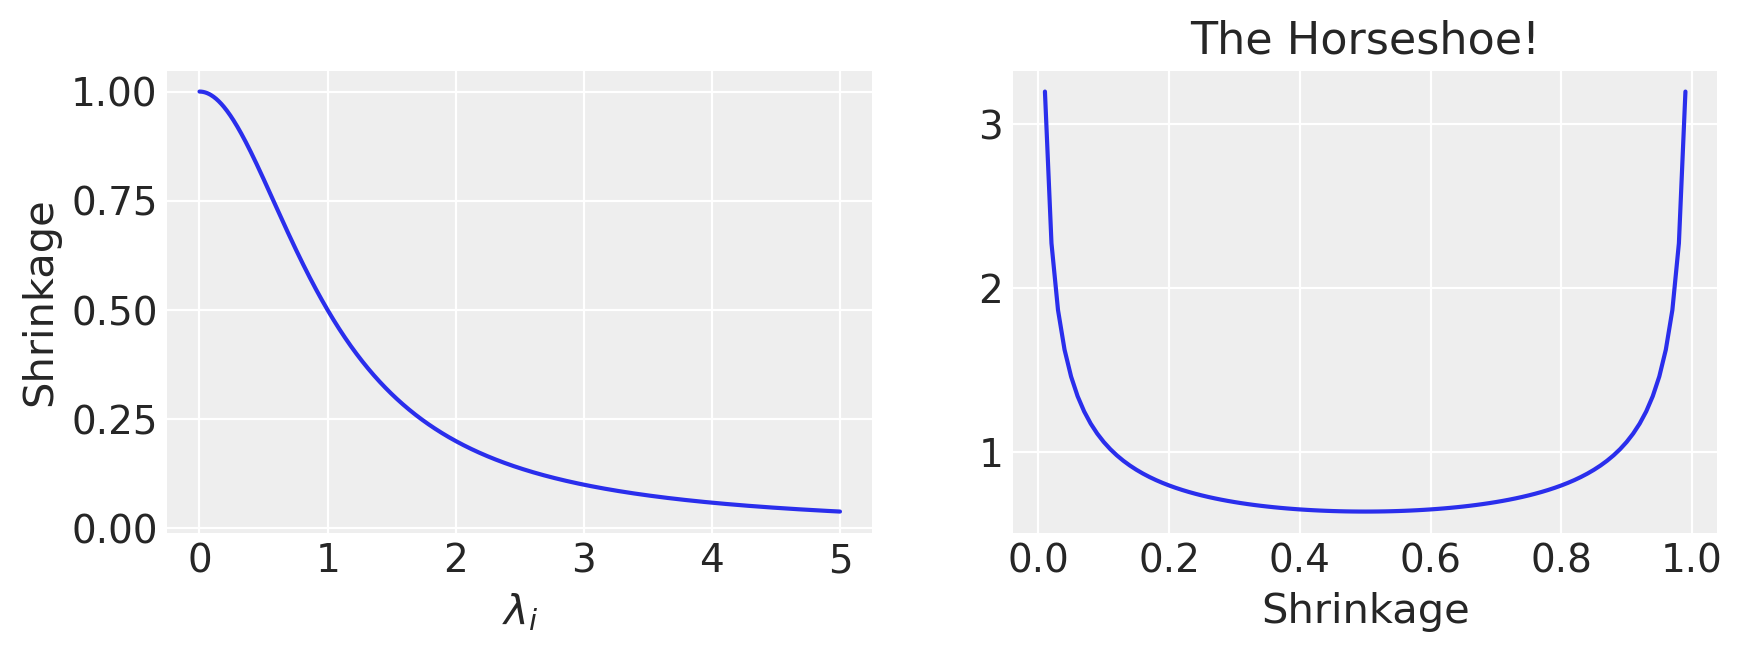

In [25]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
support = np.linspace(0,5,1000)
# shrnk = trans(spprt) = 1/(1+sprt**2)
shrinkage = 1/(1+support**2)
ax[0].plot(support, shrinkage)
ax[0].set_ylabel("Shrinkage")
ax[0].set_xlabel("$\\lambda_i$") 
# change of variables: 
# spprt = (1/shrnk-1)**0.5; E.g., 1/(1+.5**2), (1/.8-1)**0.5;
# jacobian: .5(1/shrnk-1)**(-.5)*shrnk**(-2)
shrinkage = np.linspace(0.01,.99,99)
ax[1].plot(shrinkage, 
           stats.halfcauchy(scale=1).pdf((1/shrinkage-1)**0.5) * 
           .5*(1/shrinkage-1)**(-.5)*shrinkage**(-2))
ax[1].set_title('The Horseshoe!')
ax[1].set_xlabel("Shrinkage");

In [26]:
import pymc as pm
import numpy as np
import arviz as az

# ------------------------------
# Simulate Data
# ------------------------------
np.random.seed(42)
n = 100      # observations
t = 10       # predictors

X = np.random.normal(0, 1, size=(n, t))
true_beta = np.array([3, 0, 0, -2, 0, 0, 1, 0, 0, 0])
mu_true = X @ true_beta
y = mu_true + np.random.normal(0, 1, size=n)

# ------------------------------
# Horseshoe Prior Regression
# ------------------------------
with pm.Model() as horseshoe_model:
    tau = pm.HalfCauchy("tau", beta=1)
    lambda_ = pm.HalfCauchy("lambda", beta=1, shape=t)
    sigma = pm.HalfNormal("sigma", sigma=1)

    w = pm.Normal("w", mu=0, sigma=tau * lambda_, shape=t)
    mu = pm.math.dot(X, w)

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    idata_hs = pm.sample(1000, tune=1000, target_accept=0.9, progressbar=False)

# ------------------------------
# Summarize Posterior Coefficients
# ------------------------------
w_means = idata_hs.posterior["w"].mean(dim=("chain", "draw")).values
print("Posterior means of w (Horseshoe prior):")
for i, val in enumerate(w_means):
    print(f"  w[{i}]: {val:.2f}")


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, lambda, sigma, w]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 476 divergences after tuning. Increase `target_accept` or reparameterize.


Posterior means of w (Horseshoe prior):
  w[0]: 2.93
  w[1]: -0.04
  w[2]: -0.02
  w[3]: -1.94
  w[4]: -0.07
  w[5]: 0.03
  w[6]: 0.80
  w[7]: -0.00
  w[8]: 0.03
  w[9]: -0.03


-0.09469103127955794 0.0


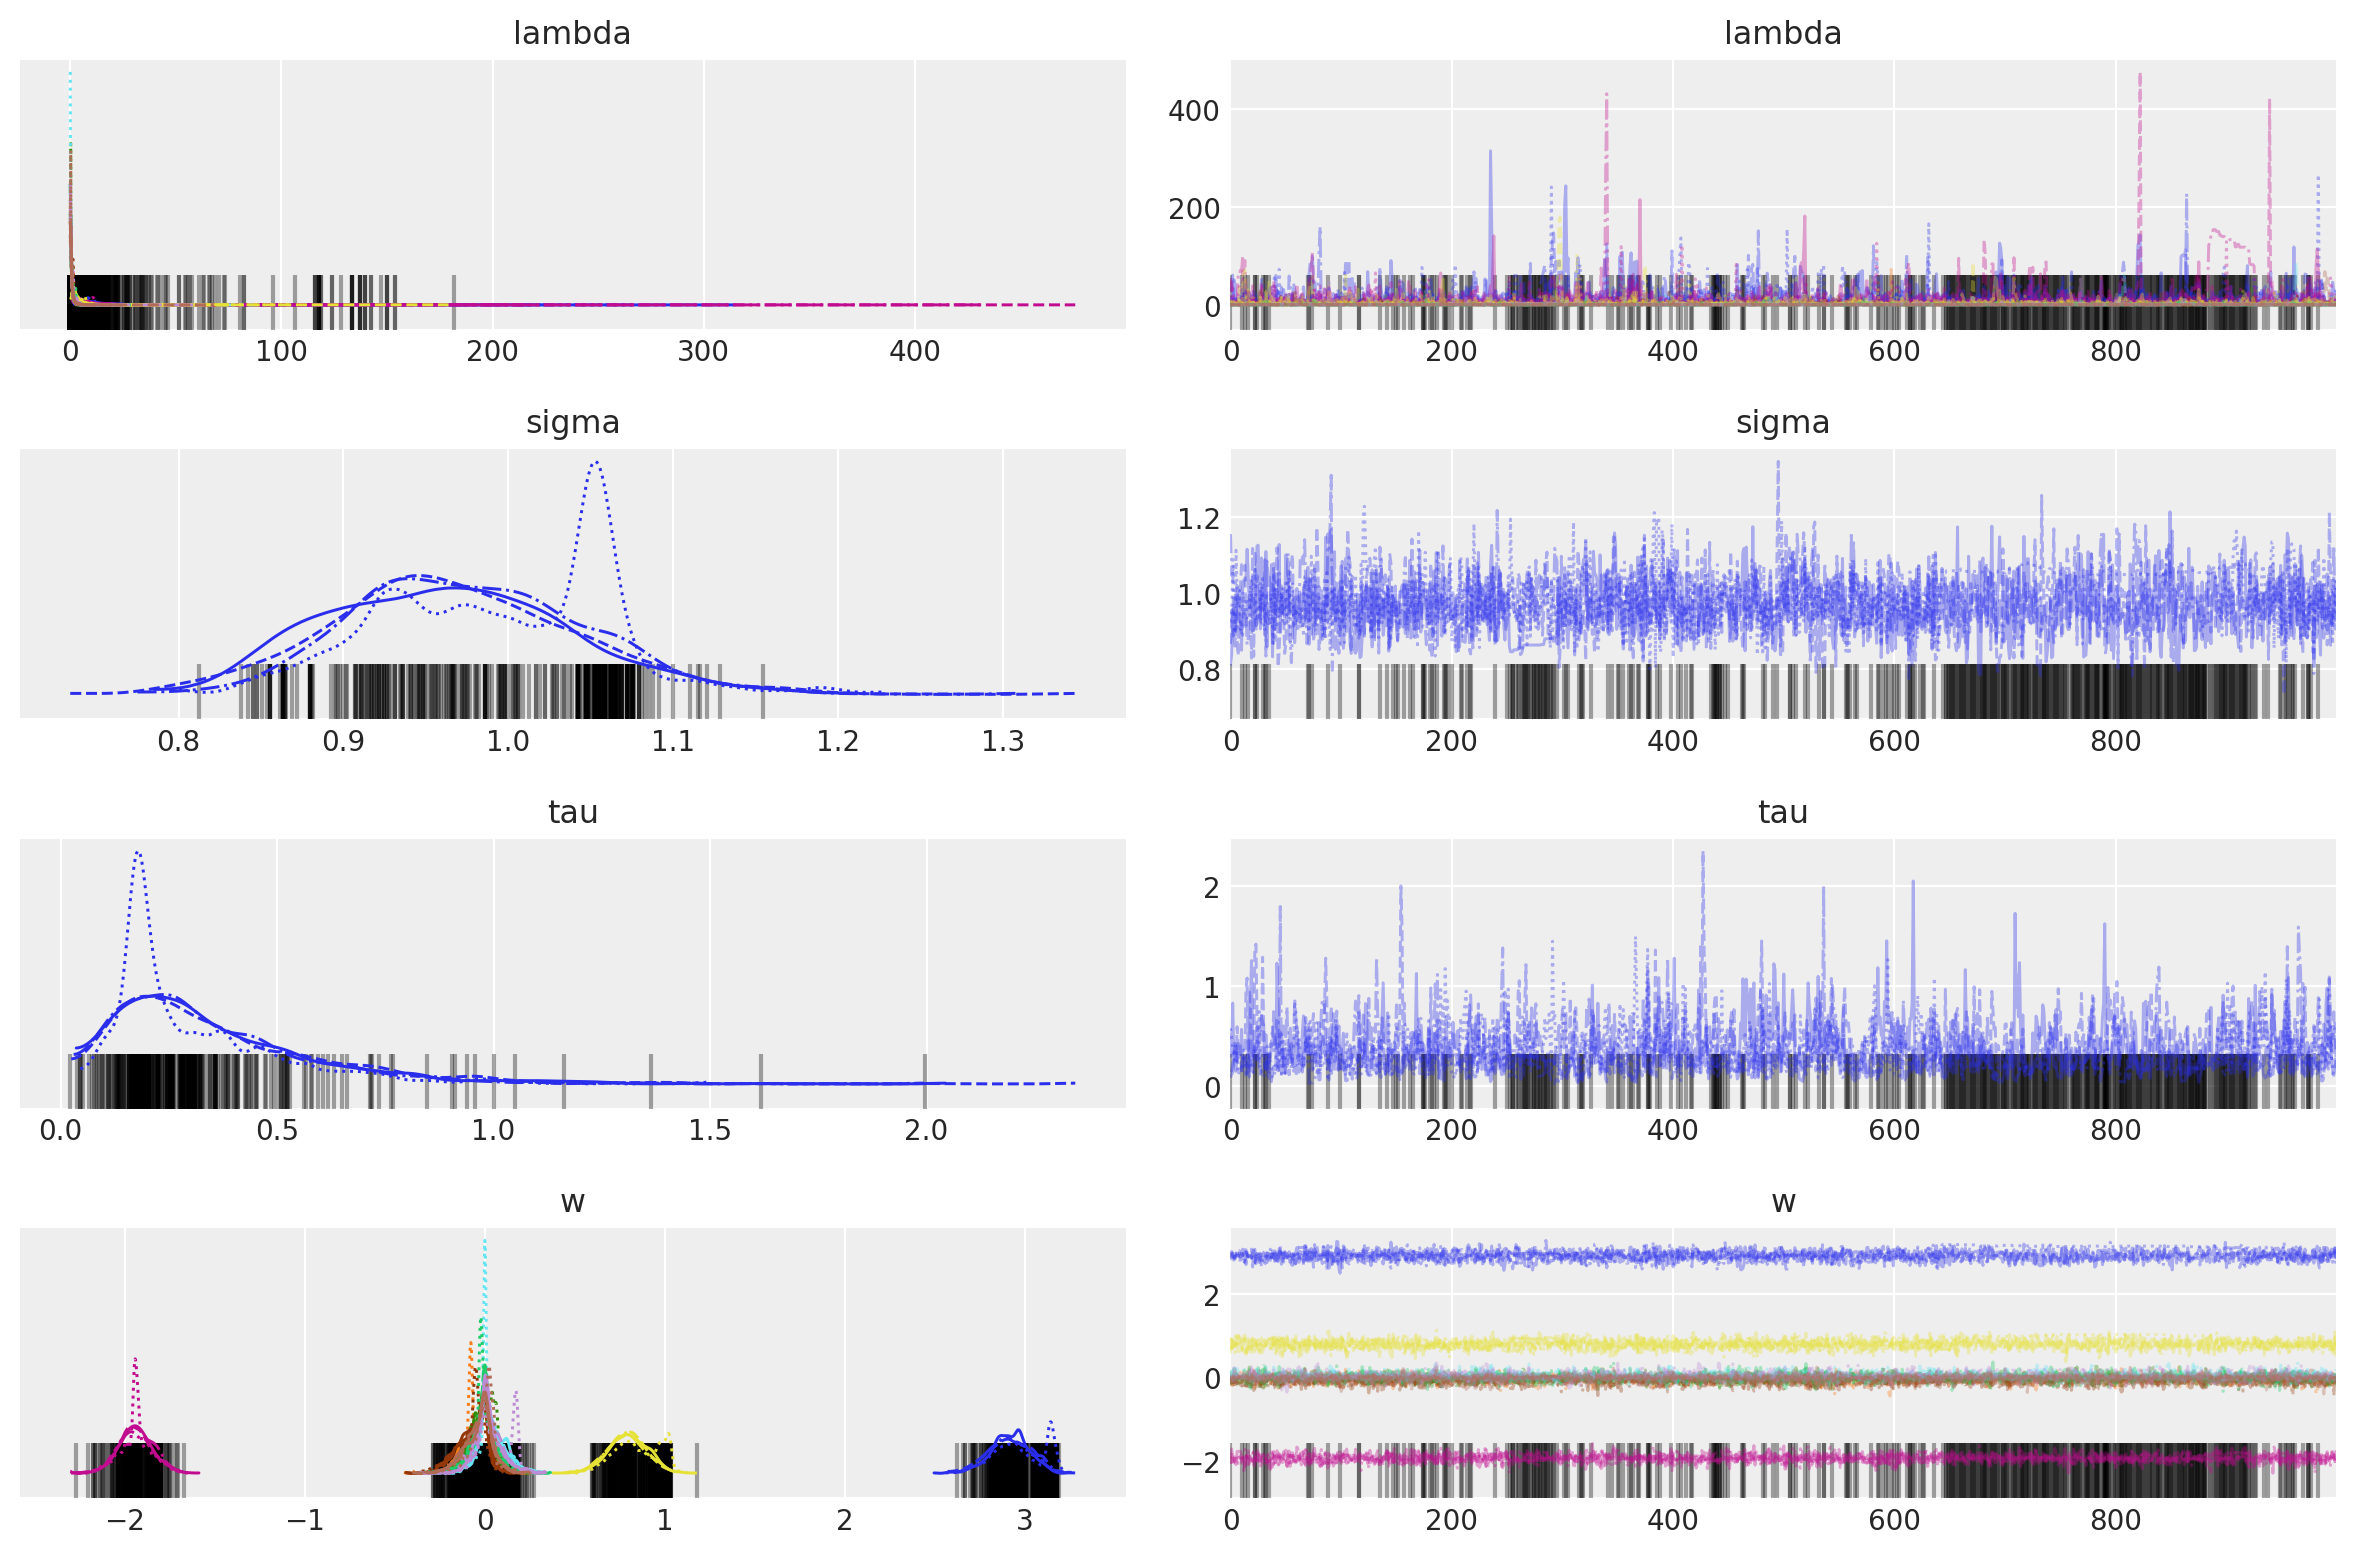

In [31]:
az.plot_trace(idata_hs, var_names=['lambda', 'sigma', 'tau', 'w'])
plt.tight_layout()
print(y.mean(axis=0).mean(),y.mean(axis=0).std())

**Interpretation**

*The inferences are made based on this horseshoe prior and the previous spike-and-slab prior plots from question 2*


The horseshoe prior and the spike-and-slab prior both aim to perform variable selection by shrinking irrelevant coefficients toward zero while allowing important ones to remain large. In the trace plots of the horseshoe model, we see that the local shrinkage parameters lambda are sharply peaked near zero for most coefficients, with a few exceptions, indicating that the model has identified only a small number of relevant predictors. This behavior is reinforced by the global shrinkage parameter $\tau$, which is concentrated near zero, enforcing sparsity across the model. The posterior of the coefficients $w$ under the horseshoe prior shows that most coefficients are tightly concentrated around zero, with only a few exhibiting clear separation from zero—similar to the effect seen in the spike-and-slab model.

Compared to spike-and-slab, the horseshoe prior does not rely on discrete inclusion indicators but instead uses continuous shrinkage, which leads to smoother posterior distributions and avoids the combinatorial complexity of binary spike variables. In the spike-and-slab model, coefficients were either clearly included or excluded based on binary “spike” variables, producing sharp sparsity and high inclusion probabilities (0 or 1). While this leads to strong variable selection, it can be computationally more demanding, especially in larger models. The horseshoe prior achieves a similar effect more efficiently through hierarchical continuous shrinkage, offering a balance between model sparsity and computational tractability.

Overall, both priors successfully identify relevant variables and shrink unimportant ones, but the horseshoe prior provides smoother, continuous shrinkage and may scale better for larger problems, while the spike-and-slab prior gives more explicit variable selection with binary inclusion decisions.